In [89]:
# import nltk
# nltk.download()

In [90]:
import numpy as np
import pandas as pd
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [91]:
stop_words = set(stopwords.words('english')) 
punctuation = set(string.punctuation)
stop_words.update(punctuation)


In [92]:
more_stop_words = ["0o", "0s", "3a", "3b", "3d", "6b", "6o", "a", "a1", "a2", "a3", "a4", "ab", "able", "about", "above", "abst", "ac", "accordance", "according", "accordingly", "across", "act", "actually", "ad", "added", "adj", "ae", "af", "affected", "affecting", "affects", "after", "afterwards", "ag", "again", "against", "ah", "ain", "ain't", "aj", "al", "all", "allow", "allows", "almost", "alone", "along", "already", "also", "although", "always", "am", "among", "amongst", "amoungst", "amount", "an", "and", "announce", "another", "any", "anybody", "anyhow", "anymore", "anyone", "anything", "anyway", "anyways", "anywhere", "ao", "ap", "apart", "apparently", "appear", "appreciate", "appropriate", "approximately", "ar", "are", "aren", "arent", "aren't", "arise", "around", "as", "a's", "aside", "ask", "asking", "associated", "at", "au", "auth", "av", "available", "aw", "away", "awfully", "ax", "ay", "az", "b", "b1", "b2", "b3", "ba", "back", "bc", "bd", "be", "became", "because", "become", "becomes", "becoming", "been", "before", "beforehand", "begin", "beginning", "beginnings", "begins", "behind", "being", "believe", "below", "beside", "besides", "best", "better", "between", "beyond", "bi", "bill", "biol", "bj", "bk", "bl", "bn", "both", "bottom", "bp", "br", "brief", "briefly", "bs", "bt", "bu", "but", "bx", "by", "c", "c1", "c2", "c3", "ca", "call", "came", "can", "cannot", "cant", "can't", "cause", "causes", "cc", "cd", "ce", "certain", "certainly", "cf", "cg", "ch", "changes", "ci", "cit", "cj", "cl", "clearly", "cm", "c'mon", "cn", "co", "com", "come", "comes", "con", "concerning", "consequently", "consider", "considering", "contain", "containing", "contains", "corresponding", "could", "couldn", "couldnt", "couldn't", "course", "cp", "cq", "cr", "cry", "cs", "c's", "ct", "cu", "currently", "cv", "cx", "cy", "cz", "d", "d2", "da", "date", "dc", "dd", "de", "definitely", "describe", "described", "despite", "detail", "df", "di", "did", "didn", "didn't", "different", "dj", "dk", "dl", "do", "does", "doesn", "doesn't", "doing", "don", "done", "don't", "down", "downwards", "dp", "dr", "ds", "dt", "du", "due", "during", "dx", "dy", "e", "e2", "e3", "ea", "each", "ec", "ed", "edu", "ee", "ef", "effect", "eg", "ei", "eight", "eighty", "either", "ej", "el", "eleven", "else", "elsewhere", "em", "empty", "en", "end", "ending", "enough", "entirely", "eo", "ep", "eq", "er", "es", "especially", "est", "et", "et-al", "etc", "eu", "ev", "even", "ever", "every", "everybody", "everyone", "everything", "everywhere", "ex", "exactly", "example", "except", "ey", "f", "f2", "fa", "far", "fc", "few", "ff", "fi", "fifteen", "fifth", "fify", "fill", "find", "fire", "first", "five", "fix", "fj", "fl", "fn", "fo", "followed", "following", "follows", "for", "former", "formerly", "forth", "forty", "found", "four", "fr", "from", "front", "fs", "ft", "fu", "full", "further", "furthermore", "fy", "g", "ga", "gave", "ge", "get", "gets", "getting", "gi", "give", "given", "gives", "giving", "gj", "gl", "go", "goes", "going", "gone", "got", "gotten", "gr", "greetings", "gs", "gy", "h", "h2", "h3", "had", "hadn", "hadn't", "happens", "hardly", "has", "hasn", "hasnt", "hasn't", "have", "haven", "haven't", "having", "he", "hed", "he'd", "he'll", "hello", "help", "hence", "her", "here", "hereafter", "hereby", "herein", "heres", "here's", "hereupon", "hers", "herself", "hes", "he's", "hh", "hi", "hid", "him", "himself", "his", "hither", "hj", "ho", "home", "hopefully", "how", "howbeit", "however", "how's", "hr", "hs", "http", "hu", "hundred", "hy", "i", "i2", "i3", "i4", "i6", "i7", "i8", "ia", "ib", "ibid", "ic", "id", "i'd", "ie", "if", "ig", "ignored", "ih", "ii", "ij", "il", "i'll", "im", "i'm", "immediate", "immediately", "importance", "important", "in", "inasmuch", "inc", "indeed", "index", "indicate", "indicated", "indicates", "information", "inner", "insofar", "instead", "interest", "into", "invention", "inward", "io", "ip", "iq", "ir", "is", "isn", "isn't", "it", "itd", "it'd", "it'll", "its", "it's", "itself", "iv", "i've", "ix", "iy", "iz", "j", "jj", "jr", "js", "jt", "ju", "just", "k", "ke", "keep", "keeps", "kept", "kg", "kj", "km", "know", "known", "knows", "ko", "l", "l2", "la", "largely", "last", "lately", "later", "latter", "latterly", "lb", "lc", "le", "least", "les", "less", "lest", "let", "lets", "let's", "lf", "like", "liked", "likely", "line", "little", "lj", "ll", "ll", "ln", "lo", "look", "looking", "looks", "los", "lr", "ls", "lt", "ltd", "m", "m2", "ma", "made", "mainly", "make", "makes", "many", "may", "maybe", "me", "mean", "means", "meantime", "meanwhile", "merely", "mg", "might", "mightn", "mightn't", "mill", "million", "mine", "miss", "ml", "mn", "mo", "more", "moreover", "most", "mostly", "move", "mr", "mrs", "ms", "mt", "mu", "much", "mug", "must", "mustn", "mustn't", "my", "myself", "n", "n2", "na", "name", "namely", "nay", "nc", "nd", "ne", "near", "nearly", "necessarily", "necessary", "need", "needn", "needn't", "needs", "neither", "never", "nevertheless", "new", "next", "ng", "ni", "nine", "ninety", "nj", "nl", "nn", "no", "nobody", "non", "none", "nonetheless", "noone", "nor", "normally", "nos", "not", "noted", "nothing", "novel", "now", "nowhere", "nr", "ns", "nt", "ny", "o", "oa", "ob", "obtain", "obtained", "obviously", "oc", "od", "of", "off", "often", "og", "oh", "oi", "oj", "ok", "okay", "ol", "old", "om", "omitted", "on", "once", "one", "ones", "only", "onto", "oo", "op", "oq", "or", "ord", "os", "ot", "other", "others", "otherwise", "ou", "ought", "our", "ours", "ourselves", "out", "outside", "over", "overall", "ow", "owing", "own", "ox", "oz", "p", "p1", "p2", "p3", "page", "pagecount", "pages", "par", "part", "particular", "particularly", "pas", "past", "pc", "pd", "pe", "per", "perhaps", "pf", "ph", "pi", "pj", "pk", "pl", "placed", "please", "plus", "pm", "pn", "po", "poorly", "possible", "possibly", "potentially", "pp", "pq", "pr", "predominantly", "present", "presumably", "previously", "primarily", "probably", "promptly", "proud", "provides", "ps", "pt", "pu", "put", "py", "q", "qj", "qu", "que", "quickly", "quite", "qv", "r", "r2", "ra", "ran", "rather", "rc", "rd", "re", "readily", "really", "reasonably", "recent", "recently", "ref", "refs", "regarding", "regardless", "regards", "related", "relatively", "research", "research-articl", "respectively", "resulted", "resulting", "results", "rf", "rh", "ri", "right", "rj", "rl", "rm", "rn", "ro", "rq", "rr", "rs", "rt", "ru", "run", "rv", "ry", "s", "s2", "sa", "said", "same", "saw", "say", "saying", "says", "sc", "sd", "se", "sec", "second", "secondly", "section", "see", "seeing", "seem", "seemed", "seeming", "seems", "seen", "self", "selves", "sensible", "sent", "serious", "seriously", "seven", "several", "sf", "shall", "shan", "shan't", "she", "shed", "she'd", "she'll", "shes", "she's", "should", "shouldn", "shouldn't", "should've", "show", "showed", "shown", "showns", "shows", "si", "side", "significant", "significantly", "similar", "similarly", "since", "sincere", "six", "sixty", "sj", "sl", "slightly", "sm", "sn", "so", "some", "somebody", "somehow", "someone", "somethan", "something", "sometime", "sometimes", "somewhat", "somewhere", "soon", "sorry", "sp", "specifically", "specified", "specify", "specifying", "sq", "sr", "ss", "st", "still", "stop", "strongly", "sub", "substantially", "successfully", "such", "sufficiently", "suggest", "sup", "sure", "sy", "system", "sz", "t", "t1", "t2", "t3", "take", "taken", "taking", "tb", "tc", "td", "te", "tell", "ten", "tends", "tf", "th", "than", "thank", "thanks", "thanx", "that", "that'll", "thats", "that's", "that've", "the", "their", "theirs", "them", "themselves", "then", "thence", "there", "thereafter", "thereby", "thered", "therefore", "therein", "there'll", "thereof", "therere", "theres", "there's", "thereto", "thereupon", "there've", "these", "they", "theyd", "they'd", "they'll", "theyre", "they're", "they've", "thickv", "thin", "think", "third", "this", "thorough", "thoroughly", "those", "thou", "though", "thoughh", "thousand", "three", "throug", "through", "throughout", "thru", "thus", "ti", "til", "tip", "tj", "tl", "tm", "tn", "to", "together", "too", "took", "top", "toward", "towards", "tp", "tq", "tr", "tried", "tries", "truly", "try", "trying", "ts", "t's", "tt", "tv", "twelve", "twenty", "twice", "two", "tx", "u", "u201d", "ue", "ui", "uj", "uk", "um", "un", "under", "unfortunately", "unless", "unlike", "unlikely", "until", "unto", "uo", "up", "upon", "ups", "ur", "us", "use", "used", "useful", "usefully", "usefulness", "uses", "using", "usually", "ut", "v", "va", "value", "various", "vd", "ve", "ve", "very", "via", "viz", "vj", "vo", "vol", "vols", "volumtype", "vq", "vs", "vt", "vu", "w", "wa", "want", "wants", "was", "wasn", "wasnt", "wasn't", "way", "we", "wed", "we'd", "welcome", "well", "we'll", "well-b", "went", "were", "we're", "weren", "werent", "weren't", "we've", "what", "whatever", "what'll", "whats", "what's", "when", "whence", "whenever", "when's", "where", "whereafter", "whereas", "whereby", "wherein", "wheres", "where's", "whereupon", "wherever", "whether", "which", "while", "whim", "whither", "who", "whod", "whoever", "whole", "who'll", "whom", "whomever", "whos", "who's", "whose", "why", "why's", "wi", "widely", "will", "willing", "wish", "with", "within", "without", "wo", "won", "wonder", "wont", "won't", "words", "world", "would", "wouldn", "wouldnt", "wouldn't", "www", "x", "x1", "x2", "x3", "xf", "xi", "xj", "xk", "xl", "xn", "xo", "xs", "xt", "xv", "xx", "y", "y2", "yes", "yet", "yj", "yl", "you", "youd", "you'd", "you'll", "your", "youre", "you're", "yours", "yourself", "yourselves", "you've", "yr", "ys", "yt", "z", "zero", "zi", "zz",]

In [93]:
stop_words.update(more_stop_words)
print(len(stop_words))
stop_words

1190


{'h',
 'ignored',
 'ph',
 'that',
 'eo',
 'twelve',
 'describe',
 'next',
 'dl',
 'fify',
 'have',
 'sc',
 'successfully',
 'unlikely',
 'yours',
 'ox',
 'theyd',
 'mt',
 ':',
 'may',
 'sufficiently',
 'besides',
 'he',
 'got',
 '0o',
 'either',
 'hid',
 'look',
 'although',
 'con',
 'sd',
 'seriously',
 'uk',
 'vol',
 'x2',
 "wouldn't",
 'described',
 'otherwise',
 'xi',
 'an',
 'line',
 'allow',
 'ng',
 "she'll",
 'io',
 'ea',
 'ob',
 'plus',
 'wa',
 'dy',
 'ones',
 'did',
 'biol',
 'unless',
 'a',
 'l',
 'sq',
 'vu',
 'yl',
 'under',
 'c',
 'four',
 'immediate',
 'couldnt',
 'was',
 'specified',
 'i7',
 'now',
 "what'll",
 'appear',
 'y2',
 'iy',
 'se',
 'no',
 'ninety',
 "couldn't",
 'fc',
 'serious',
 've',
 'i3',
 '6b',
 'km',
 'ns',
 'xj',
 'afterwards',
 'whoever',
 'date',
 'bs',
 'nor',
 'ed',
 'latter',
 'um',
 'who',
 "i'm",
 'throug',
 'necessarily',
 'hy',
 'indicated',
 'please',
 'iz',
 'fire',
 'shall',
 'td',
 'using',
 'information',
 'onto',
 'such',
 'couldn',
 'se

In [94]:
import os
# Creating the classes list i.e., all 20 folders having their name
classes = os.listdir('C:/Users/kumar/OneDrive/Desktop/20_newsgroups')
print(classes)


['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [95]:
# Creating a dictionary having
# keys : word
# values : frequency of the word
words_dic = {}

# Iterating through all classes to get each specified class
for class_ in classes :
    # getting all the text_files(1000) in a list of files
    files = os.listdir('C:/Users/kumar/OneDrive/Desktop/20_newsgroups/' + class_)
#     print(files)
    # Iterating through these files for text_classification
    for file in files :
        # getting the path to that particular document 
        file_path = 'C:/Users/kumar/OneDrive/Desktop/20_newsgroups/' + class_ + '/' + file
        # opening the document and reading the date from it
        with open(file_path, encoding = 'latin-1') as file_obj :
            data = file_obj.read()
            
            # we will use \w+ as it will find the words until they hit a non-alphanumeric character and making a list from those words
            words_list = re.compile('\w+').findall(data)
            
            for word in words_list :
                if((word.lower() not in stop_words) and (word.lower().isalpha()) and (len(word) > 3)) :
                    if(word.lower() not in words_dic) :
                        words_dic[word.lower()] = 1
                    else :
                        words_dic[word.lower()] += 1
                        
print(len(words_dic))
print(words_dic)
                    
        


95867
{'xref': 6064, 'cantaloupe': 26048, 'atheism': 2563, 'moderated': 58, 'news': 34309, 'answers': 913, 'path': 20369, 'crabapple': 6235, 'andrew': 4458, 'ohio': 15887, 'state': 18842, 'magnus': 1340, 'usenet': 8308, 'cwru': 2732, 'agate': 1827, 'spool': 581, 'uunet': 5369, 'pipex': 759, 'ibmpcug': 109, 'mantis': 625, 'mathew': 426, 'newsgroups': 20404, 'subject': 21589, 'atheist': 406, 'resources': 475, 'summary': 983, 'books': 950, 'addresses': 242, 'music': 481, 'keywords': 1554, 'fiction': 148, 'contacts': 100, 'message': 21954, 'expires': 161, 'followup': 1485, 'distribution': 4753, 'organization': 19840, 'consultants': 92, 'cambridge': 470, 'approved': 1322, 'request': 848, 'supersedes': 50, 'lines': 20894, 'archive': 510, 'modified': 236, 'december': 201, 'version': 2616, 'organizations': 281, 'freedom': 713, 'religion': 5351, 'foundation': 261, 'darwin': 2403, 'fish': 129, 'bumper': 54, 'stickers': 31, 'assorted': 29, 'paraphernalia': 5, 'write': 1078, 'ffrf': 2, 'madison': 

[   0    1    2 ... 2997 2998 2999]
[34309 26048 21954 ...   155   155   155]


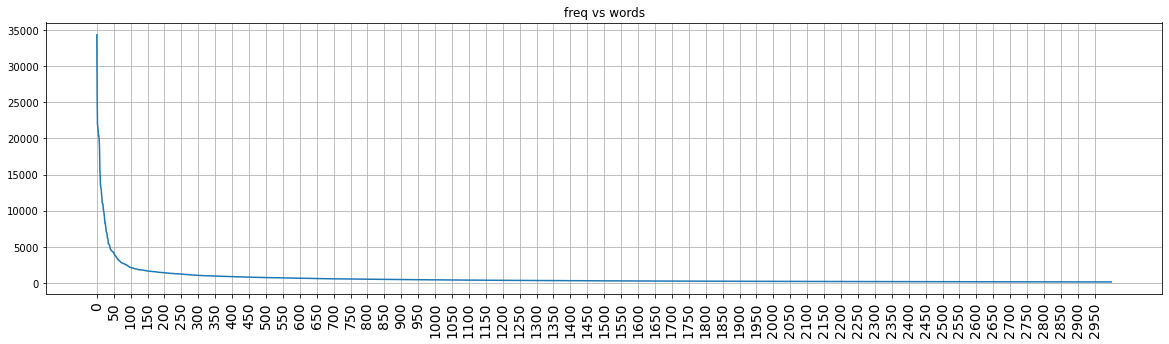

In [96]:
# Creating a graph to show how words and their frequency varies
import matplotlib.pyplot as plt

# getting the words and freq as two different np arrays
freq = np.array([i for i in words_dic.values()])
words = np.array([i for i in words_dic.keys()])

# sorting them descending order of their freq
words = words[np.argsort(freq)][::-1]
freq = np.sort(freq)[::-1]

words = words[0:3000]

x = np.arange(0, len(words))
# print(x.shape)
y = freq[0:3000]
# print(y.shape)
# print(y)
 
lower_limit = 0
upper_limit = 3000
plt.figure(figsize=(20, 5))
plt.plot(x, y)
plt.title('freq vs words')
plt.xticks(np.arange(lower_limit, upper_limit, 50), rotation=90,size=14)
print(x)
print(y)
plt.grid()
plt.show()



In [97]:
# Building the dataset from the training data

In [98]:
# dataset is a 2d array to store all the points of all documents
dataset = []
y_train = []
count = 1
# Creating the classes list i.e., all 20 folders having their name
classes = os.listdir('C:/Users/kumar/OneDrive/Desktop/20_newsgroups')

# Iterating through all classes to get each specified class
for class_ in classes :
    # getting all the text_files(1000) in a list of files
    files = os.listdir('C:/Users/kumar/OneDrive/Desktop/20_newsgroups/' + class_)
    
    # Iterating through these files for text_classification
    for file in files :
        
        # creating a single datapoint for an each document
        datapoint = np.zeros(len(words))
        
        # getting the path to that particular document 
        file_path = 'C:/Users/kumar/OneDrive/Desktop/20_newsgroups/' + class_ + '/' + file
        
        # opening the document and reading the date from it
        with open(file_path, encoding = 'latin-1') as file_obj :
            data = file_obj.read()
            
            # we will use \w+ as it will find the words until they hit a non-alphanumeric character and making a list from those words
            words_list = re.compile('\w+').findall(data)
            
            for word in words_list :
                word = word.lower()
                
                # if the word is present in the vocabulary we will increment it else we will continue on to the next word
                if word in words :
                    for i in range(len(words)) :
                        if(words[i] == word) :
                            datapoint[i] += 1
        # adding the class to the y
        y_train.append(class_)
        
        # adding the datapoint to our dataset                    
        dataset.append(datapoint)
        # checking the progress of files done
        print(count, "file done")
        count += 1

print(len(dataset))
print(dataset)
                    
        


1 file done
2 file done
3 file done
4 file done
5 file done
6 file done
7 file done
8 file done
9 file done
10 file done
11 file done
12 file done
13 file done
14 file done
15 file done
16 file done
17 file done
18 file done
19 file done
20 file done
21 file done
22 file done
23 file done
24 file done
25 file done
26 file done
27 file done
28 file done
29 file done
30 file done
31 file done
32 file done
33 file done
34 file done
35 file done
36 file done
37 file done
38 file done
39 file done
40 file done
41 file done
42 file done
43 file done
44 file done
45 file done
46 file done
47 file done
48 file done
49 file done
50 file done
51 file done
52 file done
53 file done
54 file done
55 file done
56 file done
57 file done
58 file done
59 file done
60 file done
61 file done
62 file done
63 file done
64 file done
65 file done
66 file done
67 file done
68 file done
69 file done
70 file done
71 file done
72 file done
73 file done
74 file done
75 file done
76 file done
77 file done
78 file 

In [99]:
# Building the dataset from the testing data

In [100]:
# test dataset is a 2d array to store all the points of all documents
test_data = []
y_test = []
# count = 1
# Creating the classes list i.e., all 20 folders having their name
classes = os.listdir('C:/Users/kumar/OneDrive/Desktop/mini_newsgroups')

# Iterating through all classes to get each specified class
for class_ in classes :
    # getting all the text_files(1000) in a list of files
    files = os.listdir('C:/Users/kumar/OneDrive/Desktop/mini_newsgroups/' + class_)
    
    # Iterating through these files for text_classification
    for file in files :
        
        # creating a single datapoint for an each document
        datapoint = np.zeros(len(words))
        
        # getting the path to that particular document 
        file_path = 'C:/Users/kumar/OneDrive/Desktop/mini_newsgroups/' + class_ + '/' + file
        
        # opening the document and reading the date from it
        with open(file_path, encoding = 'latin-1') as file_obj :
            data = file_obj.read()
            
            # we will use \w+ as it will find the words until they hit a non-alphanumeric character and making a list from those words
            words_list = re.compile('\w+').findall(data)
            
            for word in words_list :
                word = word.lower()
                
                # if the word is present in the vocabulary we will increment it else we will continue on to the next word
                if word in words :
                    for i in range(len(words)) :
                        if(words[i] == word) :
                            datapoint[i] += 1
        # adding the class to the y
        y_test.append(class_)
        
        # adding the datapoint to our dataset                    
        test_data.append(datapoint)
        
        # checking the progress of our testing data
#         print(count, " testing file done")
#         count += 1

print(len(test_data))
print(test_data)
                    
        


2000
[array([0., 2., 1., ..., 0., 0., 0.]), array([1., 1., 1., ..., 0., 0., 0.]), array([1., 1., 1., ..., 0., 0., 0.]), array([0., 1., 1., ..., 0., 0., 0.]), array([3., 1., 1., ..., 0., 0., 0.]), array([0., 1., 1., ..., 0., 0., 0.]), array([2., 1., 1., ..., 0., 0., 0.]), array([0., 2., 1., ..., 0., 0., 0.]), array([2., 1., 1., ..., 0., 0., 0.]), array([3., 1., 1., ..., 0., 0., 0.]), array([0., 1., 1., ..., 0., 0., 0.]), array([0., 1., 1., ..., 0., 0., 0.]), array([1., 2., 1., ..., 0., 0., 0.]), array([0., 1., 1., ..., 0., 0., 0.]), array([1., 1., 1., ..., 0., 0., 0.]), array([2., 1., 1., ..., 0., 0., 0.]), array([2., 1., 1., ..., 0., 0., 0.]), array([2., 1., 1., ..., 0., 0., 0.]), array([1., 1., 1., ..., 0., 0., 0.]), array([2., 1., 1., ..., 0., 0., 0.]), array([2., 1., 1., ..., 0., 0., 0.]), array([2., 1., 1., ..., 0., 0., 0.]), array([2., 1., 1., ..., 0., 0., 0.]), array([2., 1., 1., ..., 0., 0., 0.]), array([4., 2., 1., ..., 0., 0., 0.]), array([3., 1., 1., ..., 0., 0., 0.]), array(

In [101]:
print(y_test)
print(len(y_test))

['alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.atheism', 'alt.athe

In [102]:
X_train = dataset
Y_train = y_train
X_test = test_data
Y_test = y_test

In [103]:
df_x_train = pd.DataFrame(X_train)
df_y_train = pd.DataFrame(Y_train)
df_x_test = pd.DataFrame(X_test)
df_y_test = pd.DataFrame(Y_test)

df_x_train.to_csv("text_classification_x_train.csv")
df_y_train.to_csv("text_classification_y_train.csv")
df_x_test.to_csv("text_classification_x_test.csv")
df_y_test.to_csv("text_classification_y_test.csv")



In [104]:
# Using sklearn inbuilt multinomial Naive Bayes Classifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

In [105]:
# creating the classifier
clf = MultinomialNB()

#fitting the train_data
clf.fit(X_train, Y_train)

# testing the score for training data
Y_pred = clf.predict(X_test)

# Generating the classification report and printing the confusion matrix
print(classification_report(Y_test,Y_pred))
print(confusion_matrix(Y_test,Y_pred))

print(clf.score(X_test, Y_test))

                          precision    recall  f1-score   support

             alt.atheism       0.82      0.82      0.82       100
           comp.graphics       0.91      0.86      0.89       100
 comp.os.ms-windows.misc       0.84      0.92      0.88       100
comp.sys.ibm.pc.hardware       0.79      0.82      0.80       100
   comp.sys.mac.hardware       0.81      0.89      0.85       100
          comp.windows.x       0.95      0.84      0.89       100
            misc.forsale       0.93      0.99      0.96       100
               rec.autos       0.99      0.96      0.97       100
         rec.motorcycles       0.91      1.00      0.95       100
      rec.sport.baseball       0.98      0.97      0.97       100
        rec.sport.hockey       0.98      0.97      0.97       100
               sci.crypt       0.98      0.96      0.97       100
         sci.electronics       0.94      0.94      0.94       100
                 sci.med       0.97      0.89      0.93       100
         

In [106]:
# we are making an array of score and classes from the classification report
sk_learn_clf_report = classification_report(Y_test, Y_pred)
sk_learn_clf_report = sk_learn_clf_report.split('\n')
for i in sk_learn_clf_report :
    if i == "":
        sk_learn_clf_report.remove(i)
# clf_report
sk_learn_clf_score = []
classes = []
# we don't need the top column names of classification report as well as the rows having accuracy and avg so we skip those rows
for i in sk_learn_clf_report[1:-3] :
    sk_learn_clf_score.append(float(i.split()[3]))
    classes.append(i.split()[0])
print(classes)
print(sk_learn_clf_score)



['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']
[0.82, 0.89, 0.88, 0.8, 0.85, 0.89, 0.96, 0.97, 0.95, 0.97, 0.97, 0.97, 0.94, 0.93, 0.97, 0.99, 0.87, 0.95, 0.77, 0.7]


In [109]:
# Implementing the Multinomial Naive Bayes from scratch

In [133]:
# fit function which takes training data and gives us a dictionary 

def fit(X_train, Y_train) :
    # dictionary 
    count = dict()
    # creating a total_data which contains the total count of all words
    count['total_data'] = 0
    
    # creating the classes from our y_train by taking only the unique values
    classes = set(Y_train)
    
    # traversing through each class 
    for class_ in classes :
        
        # creating the dictionary having values as another dictionary
        count[class_] = dict()
        
        # all those docs which belong to the current class 
        docs = X_train[Y_train == class_]
        
        # finding the total number of features from our x_train columns
        num_features = X_train.shape[1]
        
        # now we will maintain the total words which belong to that specific doc
        count[class_]['total'] = 0
        
        # iterating through each features which correspond to the word in our vocabulary and belong to our current class_ and addin gits total in our dict values
        for i in range(num_features) :
            # taking all the row total from a specific column which correspond to a word in our vocabulary
            count[class_][i] = docs[:,i].sum()
            
            # updating the total number of words for our current class
            count[class_]['total'] += count[class_][i]
            
        count['total_data'] += count[class_]['total']
            
    return count
        
    

In [134]:
# this is our main probability function which check the probability for each class for a specific x 
# it takes three arguments dictionary that we created in our fit func and x which is our row from our testing data and current class  for which we are caculating the probability
def probability(dictionary, x, current_class) :
    # we are calculating the log probabilities rather than taking the normal probabilities as the probabilty for class can be very small that it will correspond to zero
    output = np.log(dictionary[current_class]['total']) - np.log(dictionary['total_data'])
    # finding the total num of features
    num_features = len(x)
    
    # iterating through each features 
    for j in range(num_features) :
        # skipping the features whose value is zero as they are not present in the x i.e., this word is not present in our x 
        if(x[j] != 0) :
            count_current_class_with_value_xj = dictionary[current_class][j] + 1
            count_current_class = dictionary[current_class]['total'] + num_features
            # finding the probability of our current feature 
            current_xj_probability = np.log(count_current_class_with_value_xj) - np.log(count_current_class)
            # adding this probability onto our main output probability
            output = output + current_xj_probability
    return output
    
    

In [135]:
def predictSinglePoint(dictionary, x) :
    # as the dictionary contains all the classes as its keys we got our classes for which we will find the probability
    classes = dictionary.keys()
    
    # initializing the best probability to be a huge negative number
    best_p = -1000
    # initializing the best class to be a negative as we don't have any class for negative num
    best_class = -1
    
    # creating a flag to check if it is the first class or not
    first_run = True
    
    # iterating through all classes 
    for current_class in classes :
        # as we have one of the keys as total_data which is not used for predicting so we skip it
        if current_class == 'total_data' :
            continue
        # finding the probability for our current class by using the function probability
        p_current_class = probability(dictionary, x, current_class)
        # checking if it is our first class or if p_current_class is greater than best_p we will update the values for best_p and best_class
        if(first_run or p_current_class > best_p) :
            best_p = p_current_class
            best_class = current_class
        # updating the first run as it can only be true for our first class
        first_run = False     
    return best_class
        

In [143]:
# predict function 
# takes two argument one of them is X_test(testing data) and another is the dictionary that is returned from our fit function 
# returns the Y_pred a list of predicting classes
def predict(dictionary, X_test) :
    Y_pred = list()
    count = 1
    # y_pred contains the classes which have been predicted for each document in our testing data
    # using a count to check the progress
    for x in X_test :
        # this x is each row which we created while creating our testing data from all those files
        pred_class = predictSinglePoint(dictionary, x)
        # this is our predicted class that we got from predicting that specific doc we will append it onto our final predicting list 
        Y_pred.append(pred_class)
        percentage = (count / len(X_test)) * 100
        count += 1
        print("Progress - ", "%.2f" % percentage, "%")
        
    return Y_pred

In [144]:
X_train = np.array(X_train)
Y_train = np.array(Y_train)
X_test = np.array(X_test)
Y_test = np.array(Y_test)

print(X_train)
print("-------------------------------------------------------------")
print(Y_train)
print("-------------------------------------------------------------")
print(X_test)

[[4. 2. 1. ... 0. 0. 0.]
 [3. 2. 2. ... 0. 0. 0.]
 [2. 1. 1. ... 0. 0. 0.]
 ...
 [0. 2. 1. ... 0. 0. 0.]
 [2. 2. 1. ... 0. 0. 0.]
 [1. 2. 1. ... 0. 0. 0.]]
-------------------------------------------------------------
['alt.atheism' 'alt.atheism' 'alt.atheism' ... 'talk.religion.misc'
 'talk.religion.misc' 'talk.religion.misc']
-------------------------------------------------------------
[[0. 2. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 [1. 1. 1. ... 0. 0. 0.]
 ...
 [3. 1. 1. ... 0. 0. 0.]
 [3. 1. 1. ... 0. 0. 0.]
 [2. 2. 1. ... 0. 0. 0.]]


In [145]:
# fitting our own written naive bayes classifier with training data

In [146]:
dictionary = fit(X_train, Y_train)

In [147]:
# predicting it 

In [148]:
Y_pred_wtn_clf = predict(dictionary, X_test)

Progress -  0.05 %
Progress -  0.10 %
Progress -  0.15 %
Progress -  0.20 %
Progress -  0.25 %
Progress -  0.30 %
Progress -  0.35 %
Progress -  0.40 %
Progress -  0.45 %
Progress -  0.50 %
Progress -  0.55 %
Progress -  0.60 %
Progress -  0.65 %
Progress -  0.70 %
Progress -  0.75 %
Progress -  0.80 %
Progress -  0.85 %
Progress -  0.90 %
Progress -  0.95 %
Progress -  1.00 %
Progress -  1.05 %
Progress -  1.10 %
Progress -  1.15 %
Progress -  1.20 %
Progress -  1.25 %
Progress -  1.30 %
Progress -  1.35 %
Progress -  1.40 %
Progress -  1.45 %
Progress -  1.50 %
Progress -  1.55 %
Progress -  1.60 %
Progress -  1.65 %
Progress -  1.70 %
Progress -  1.75 %
Progress -  1.80 %
Progress -  1.85 %
Progress -  1.90 %
Progress -  1.95 %
Progress -  2.00 %
Progress -  2.05 %
Progress -  2.10 %
Progress -  2.15 %
Progress -  2.20 %
Progress -  2.25 %
Progress -  2.30 %
Progress -  2.35 %
Progress -  2.40 %
Progress -  2.45 %
Progress -  2.50 %
Progress -  2.55 %
Progress -  2.60 %
Progress -  

In [150]:
# Classification report of our own written classifier
print(classification_report(Y_test, Y_pred_wtn_clf))
print(confusion_matrix(Y_test, Y_pred_wtn_clf))

                          precision    recall  f1-score   support

             alt.atheism       0.76      0.87      0.81       100
           comp.graphics       0.86      0.82      0.84       100
 comp.os.ms-windows.misc       0.84      0.93      0.88       100
comp.sys.ibm.pc.hardware       0.81      0.81      0.81       100
   comp.sys.mac.hardware       0.84      0.92      0.88       100
          comp.windows.x       0.96      0.82      0.89       100
            misc.forsale       0.92      0.98      0.95       100
               rec.autos       0.97      0.97      0.97       100
         rec.motorcycles       0.96      0.99      0.98       100
      rec.sport.baseball       0.98      0.99      0.99       100
        rec.sport.hockey       0.99      0.97      0.98       100
               sci.crypt       0.98      0.97      0.97       100
         sci.electronics       0.92      0.94      0.93       100
                 sci.med       0.97      0.93      0.95       100
         

In [151]:
# we are making an array of score and classes from the classification report
wtn_clf_report = classification_report(Y_test, Y_pred_wtn_clf)
wtn_clf_report = wtn_clf_report.split('\n')
for i in wtn_clf_report :
    if i == "":
        wtn_clf_report.remove(i)
# clf_report
wtn_clf_score = []
# we don't need the top column names of classification report as well as the rows having accuracy and avg so we skip those rows
for i in wtn_clf_report[1:-3] :
    wtn_clf_score.append(float(i.split()[3]))

print(wtn_clf_score)

[0.81, 0.84, 0.88, 0.81, 0.88, 0.89, 0.95, 0.97, 0.98, 0.99, 0.98, 0.97, 0.93, 0.95, 0.97, 0.99, 0.86, 0.94, 0.73, 0.64]


In [152]:
# Comparing the two naive bayes classifiers

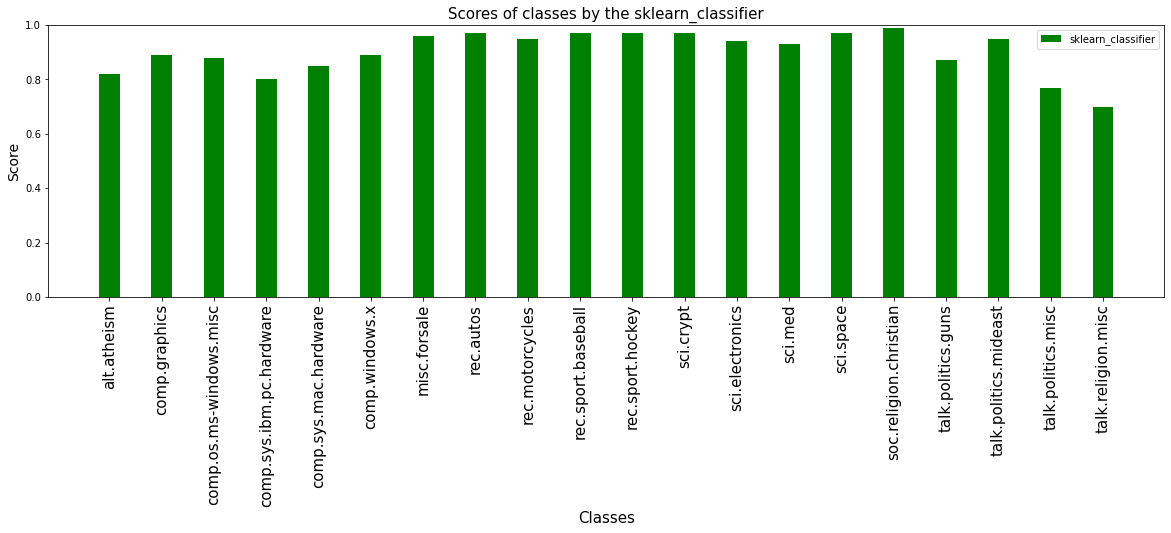

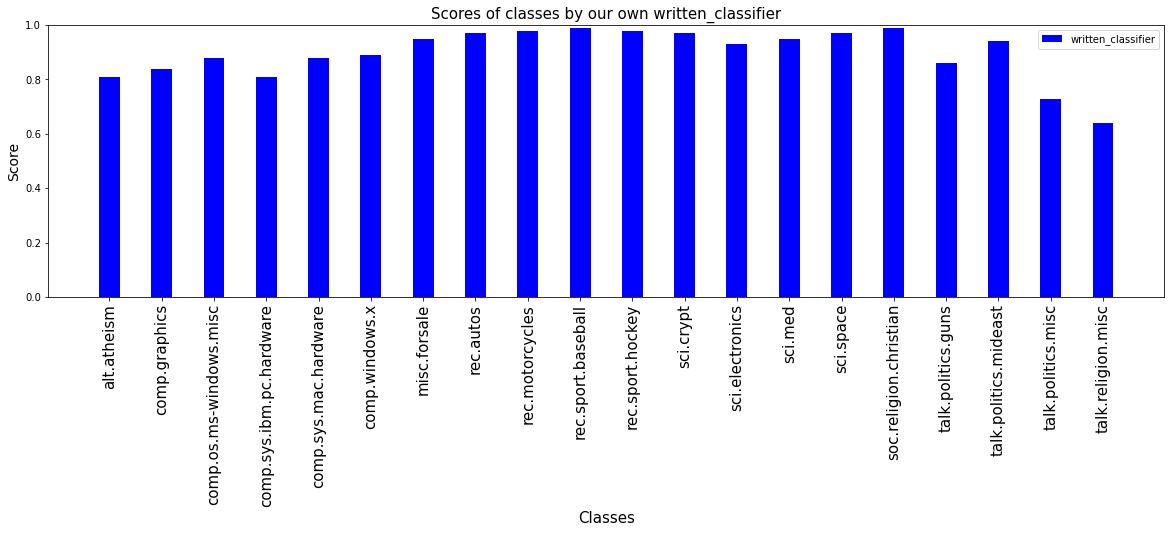

In [153]:
# we will use bar graph to compare those classifiers and the percentage they predict for each class

# we will use two subplots
plt.subplots(figsize=(20, 5))
# x is out classes and y is our percentage of the score 
plt.bar(classes, sk_learn_clf_score, color="green", width=0.4, label='sklearn_classifier')
plt.xlabel("Classes", size=15)
plt.xticks(rotation=90, size=15)
# creting the axis for x to be none and y to be between 0 and 1
plt.axis((None,None,0,1))
plt.ylabel("Score",size=14)
plt.title("Scores of classes by the sklearn_classifier", size=15)
plt.legend()
plt.show()

plt.subplots(figsize=(20, 5))
# x is out classes and y is our percentage of the score 
plt.bar(classes, wtn_clf_score, color="blue", width=0.4, label='written_classifier')
plt.xlabel("Classes", size=15)
plt.xticks(rotation=90, size=15)
plt.axis((None,None,0,1))
plt.ylabel("Score",size=14)
plt.title("Scores of classes by our own written_classifier", size=15)
plt.legend()
plt.show()

In [154]:
# Comparing their accuracy through line graph

Overall Acurracy of both classifier is almost same


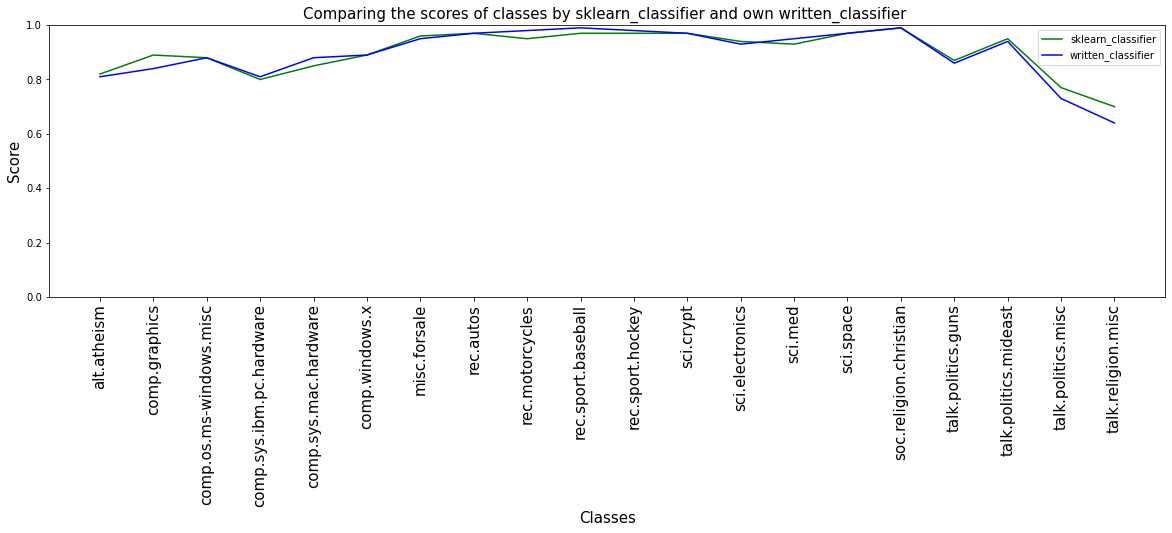

In [155]:
print("Overall Acurracy of both classifier is almost same")

plt.subplots(figsize=(20, 5))
plt.plot(classes, sk_learn_clf_score, color="green", label='sklearn_classifier')
plt.plot(classes, wtn_clf_score, color='blue', label='written_classifier')
plt.xlabel("Classes", size=15)
plt.xticks(rotation=90, size=15)
plt.axis((None,None,0,1))
plt.ylabel("Score",size=15)
plt.title("Comparing the scores of classes by sklearn_classifier and own written_classifier ", size=15)
plt.legend()
plt.show()